# Course Recommendation System

# EDA

In [2]:
import pandas as pd
import seaborn as sns
import neattext.functions as nfx

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [4]:
df = pd.read_csv("udemy_courses.csv")

In [5]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [6]:
df.shape

(3678, 12)

In [7]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [8]:
df['course_title'].apply(nfx.remove_stopwords)

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow Pra...
2        Financial Modeling Business Analysts Consultants
3            Beginner Pro - Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3673     Learn jQuery Scratch - Master JavaScript library
3674                      Design WordPress Website Coding
3675                                  Learn Build Polymer
3676       CSS Animations: Create Amazing Effects Website
3677            MODX CMS Build Websites: Beginner's Guide
Name: course_title, Length: 3678, dtype: object

In [11]:
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [12]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3673,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3674,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3675,Learn Build Polymer,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [13]:
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

In [14]:
df['clean_course_title'] = df['clean_course_title'].str.lower()

In [15]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,ultimate investment banking course,Ultimate Investment Banking Course
1,complete gst course certification grow practice,Complete GST Course & Certification - Grow You...
2,financial modeling business analysts consultants,Financial Modeling for Business Analysts and C...
3,beginner pro financial analysis excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,maximize profits trading options,How To Maximize Your Profits Trading Options
...,...,...
3673,learn jquery scratch master javascript library,Learn jQuery from Scratch - Master of JavaScri...
3674,design wordpress website coding,How To Design A WordPress Website With No Codi...
3675,learn build polymer,Learn and Build using Polymer
3676,css animations create amazing effects website,CSS Animations: Create Amazing Effects on Your...


Building Features

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
Xfeatures = df['clean_course_title']
ylabels = df['subject']

In [18]:
Xfeatures

0                      ultimate investment banking course
1       complete gst course  certification  grow practice
2        financial modeling business analysts consultants
3             beginner pro  financial analysis excel 2017
4                        maximize profits trading options
                              ...                        
3673      learn jquery scratch  master javascript library
3674                      design wordpress website coding
3675                                  learn build polymer
3676        css animations create amazing effects website
3677              modx cms build websites beginners guide
Name: clean_course_title, Length: 3678, dtype: object

In [19]:
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(Xfeatures)

In [21]:
X

<3678x3559 sparse matrix of type '<class 'numpy.float64'>'
	with 18333 stored elements in Compressed Sparse Row format>

In [22]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
df_vec = pd.DataFrame(X.todense(),columns=tfidf_vec.get_feature_names())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
df_vec.T

,0,1,2,3,4,5,6,7,8,9,...,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677
000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuhause,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Workflow

-->Import Dataset
-->Vectorize Dataset
-->Cosine Similarity Matrix
-->ID Score
-->Recommend

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [67]:
df.count()

course_id              3678
course_title           3678
url                    3678
is_paid                3678
price                  3678
num_subscribers        3678
num_reviews            3678
num_lectures           3678
level                  3678
content_duration       3678
published_timestamp    3678
subject                3678
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [69]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [70]:
len(df['subject'].unique())

4

In [71]:
subject_values = df['subject'].unique()
print(subject_values)

['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


In [1]:

import neattext.functions as nfx # used to clean text data
from sklearn.feature_extraction.text import TfidfVectorizer # Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import CountVectorizer # a method to convert text to numerical data
from sklearn.metrics.pairwise import cosine_similarity # measures the similarity between two vectors of an inner product space
from sklearn.metrics.pairwise import linear_kernel # Compute the linear kernel between X and Y

# Cleaning course_title column

In [3]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [5]:
# Remove stopwords
df["clean_title"] = df["course_title"].apply(nfx.remove_stopwords)

# Remove special characters
df["clean_title"] = df["course_title"].apply(nfx.remove_special_characters)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Your ...
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,Financial Modeling for Business Analysts and C...
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,Beginner to Pro Financial Analysis in Excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,How To Maximize Your Profits Trading Options


In [6]:
#vectorising i.e converting text to numericals
count_vect = CountVectorizer()
cv_matrix = count_vect.fit_transform(df["clean_title"])
cv_matrix

<3678x3676 sparse matrix of type '<class 'numpy.int64'>'
	with 23407 stored elements in Compressed Sparse Row format>

Cosine similarity

In [7]:
cos_sim = cosine_similarity(cv_matrix)
cos_sim

array([[1.        , 0.1767767 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1767767 , 1.        , 0.        , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.16903085, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.16903085, ..., 1.        , 0.        ,
        0.31622777],
       [0.        , 0.125     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.31622777, 0.        ,
        1.        ]])

In [8]:
cos_sim.shape

(3678, 3678)

In [15]:
title = "How To Maximize Your Profits Trading Options"
course_index = pd.Series(df.index, 
                        index=df["course_title"]).drop_duplicates()

course_index

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3673
How To Design A WordPress Website With No Coding At All        3674
Learn and Build using Polymer                                  3675
CSS Animations: Create Amazing Effects on Your Website         3676
Using MODX CMS to Build Websites: A Beginner's Guide           3677
Length: 3678, dtype: int64

In [16]:
index = course_index[title]
index

4

In [17]:
cos_sim[4]

array([0.        , 0.13363062, 0.        , ..., 0.        , 0.13363062,
       0.13363062])

In [18]:
# get a list of course index and the cosine similarity score
scores = list(enumerate(cos_sim[4]))
scores

[(0, 0.0),
 (1, 0.13363062095621217),
 (2, 0.0),
 (3, 0.13363062095621217),
 (4, 0.9999999999999997),
 (5, 0.1259881576697424),
 (6, 0.13363062095621217),
 (7, 0.13363062095621217),
 (8, 0.26726124191242434),
 (9, 0.1259881576697424),
 (10, 0.1259881576697424),
 (11, 0.3380617018914066),
 (12, 0.0),
 (13, 0.1259881576697424),
 (14, 0.2519763153394848),
 (15, 0.1259881576697424),
 (16, 0.0),
 (17, 0.13363062095621217),
 (18, 0.2519763153394848),
 (19, 0.0),
 (20, 0.2182178902359924),
 (21, 0.2519763153394848),
 (22, 0.1259881576697424),
 (23, 0.1543033499620919),
 (24, 0.11952286093343936),
 (25, 0.11952286093343936),
 (26, 0.0),
 (27, 0.1091089451179962),
 (28, 0.0),
 (29, 0.3585685828003181),
 (30, 0.3779644730092272),
 (31, 0.0),
 (32, 0.1091089451179962),
 (33, 0.28571428571428564),
 (34, 0.0),
 (35, 0.26726124191242434),
 (36, 0.20965696734438366),
 (37, 0.14285714285714282),
 (38, 0.1259881576697424),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.5976143046671968),
 (44,

In [19]:
# sort the scores in decending order from highest to lowest
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
sorted_scores

[(4, 0.9999999999999997),
 (43, 0.5976143046671968),
 (461, 0.5714285714285713),
 (59, 0.5698028822981898),
 (414, 0.5669467095138407),
 (67, 0.5345224838248487),
 (116, 0.50709255283711),
 (385, 0.50709255283711),
 (111, 0.5039526306789696),
 (165, 0.5039526306789696),
 (1132, 0.47809144373375745),
 (68, 0.4629100498862757),
 (86, 0.4629100498862757),
 (1911, 0.4629100498862757),
 (145, 0.4558423058385518),
 (203, 0.4364357804719848),
 (408, 0.4364357804719848),
 (428, 0.4364357804719848),
 (185, 0.4285714285714285),
 (220, 0.4285714285714285),
 (695, 0.4285714285714285),
 (1846, 0.4285714285714285),
 (3584, 0.4285714285714285),
 (1792, 0.4193139346887673),
 (648, 0.40089186286863654),
 (702, 0.40089186286863654),
 (1136, 0.40089186286863654),
 (1143, 0.40089186286863654),
 (1376, 0.40089186286863654),
 (1542, 0.40089186286863654),
 (2879, 0.40089186286863654),
 (3062, 0.40089186286863654),
 (809, 0.3903600291794132),
 (1925, 0.3903600291794132),
 (2539, 0.3903600291794132),
 (30, 0.3

In [20]:
# get course index
# we are indexing from [1:] so as not to recommend the same course
selected_course_index = [i[0] for i in sorted_scores[1:]]
selected_course_index

[43,
 461,
 59,
 414,
 67,
 116,
 385,
 111,
 165,
 1132,
 68,
 86,
 1911,
 145,
 203,
 408,
 428,
 185,
 220,
 695,
 1846,
 3584,
 1792,
 648,
 702,
 1136,
 1143,
 1376,
 1542,
 2879,
 3062,
 809,
 1925,
 2539,
 30,
 44,
 46,
 71,
 193,
 328,
 424,
 512,
 551,
 736,
 796,
 987,
 1001,
 1119,
 1167,
 1683,
 1704,
 2823,
 3300,
 3331,
 3627,
 2095,
 29,
 94,
 136,
 152,
 204,
 508,
 578,
 801,
 1370,
 1795,
 2973,
 3314,
 50,
 57,
 377,
 442,
 740,
 827,
 1984,
 3029,
 3487,
 11,
 66,
 95,
 336,
 437,
 446,
 498,
 523,
 645,
 781,
 904,
 928,
 944,
 1517,
 1689,
 2028,
 2763,
 2922,
 3668,
 397,
 898,
 1112,
 1186,
 1802,
 1946,
 2847,
 3378,
 138,
 422,
 1127,
 84,
 234,
 271,
 293,
 367,
 376,
 694,
 764,
 937,
 947,
 1170,
 1216,
 1246,
 1253,
 1526,
 1578,
 1633,
 1640,
 1956,
 2117,
 2443,
 2890,
 3107,
 3274,
 3404,
 3506,
 3577,
 3633,
 2610,
 2658,
 3407,
 2036,
 2169,
 33,
 49,
 61,
 85,
 142,
 155,
 158,
 184,
 232,
 245,
 252,
 301,
 320,
 335,
 361,
 391,
 399,
 409,
 454,
 

In [21]:
# Get course cosine similarity score
# we are indexing from [1:] so as not to recommend the same course
selected_course_score = [i[1] for i in sorted_scores[1:]]
selected_course_score

[0.5976143046671968,
 0.5714285714285713,
 0.5698028822981898,
 0.5669467095138407,
 0.5345224838248487,
 0.50709255283711,
 0.50709255283711,
 0.5039526306789696,
 0.5039526306789696,
 0.47809144373375745,
 0.4629100498862757,
 0.4629100498862757,
 0.4629100498862757,
 0.4558423058385518,
 0.4364357804719848,
 0.4364357804719848,
 0.4364357804719848,
 0.4285714285714285,
 0.4285714285714285,
 0.4285714285714285,
 0.4285714285714285,
 0.4285714285714285,
 0.4193139346887673,
 0.40089186286863654,
 0.40089186286863654,
 0.40089186286863654,
 0.40089186286863654,
 0.40089186286863654,
 0.40089186286863654,
 0.40089186286863654,
 0.40089186286863654,
 0.3903600291794132,
 0.3903600291794132,
 0.3903600291794132,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.37796

In [22]:
# We now locate the courses
rec_df = df.iloc[selected_course_index]
rec_df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_title
43,627540,Options Trading - How to Win with Weekly Options,https://www.udemy.com/work-from-home-setup-you...,True,115,7489,1190,25,Intermediate Level,1.000000,2015-10-22T21:54:28Z,Business Finance,Options Trading How to Win with Weekly Options
461,1276182,Options Trading Foundation: Your journey to co...,https://www.udemy.com/option-trading-foundatio...,True,95,0,0,5,Intermediate Level,1.000000,2017-07-05T04:41:54Z,Business Finance,Options Trading Foundation Your journey to com...
59,1239068,How to Buy Cheap Options - Options Trading Pri...,https://www.udemy.com/options-black-scholes-mo...,True,200,658,2,19,All Levels,1.000000,2017-06-02T18:12:45Z,Business Finance,How to Buy Cheap Options Options Trading Pric...
414,613944,How to trade options,https://www.udemy.com/how-to-trade-options/,True,45,12,1,9,Intermediate Level,0.716667,2015-09-20T21:45:48Z,Business Finance,How to trade options
67,408440,How to Win 97% of Your Options Trades,https://www.udemy.com/how-to-win-97-percent-of...,True,125,5050,461,26,All Levels,1.500000,2015-02-10T04:21:40Z,Business Finance,How to Win 97 of Your Options Trades


In [23]:
# Add the similarity score to the rec_df dataframe
rec_df["similarity_score"] = selected_course_score

final_recommende_courses = rec_df[[
    'course_title', 'similarity_score', 'url', 'price', 
    'num_subscribers'
]]

final_recommende_courses

/var/folders/4x/pys3bw9s5jz3cwnmzxqyxzrc0000gn/T/ipykernel_5303/4245796778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_df["similarity_score"] = selected_course_score


,course_title,similarity_score,url,price,num_subscribers
43,Options Trading - How to Win with Weekly Options,0.597614,https://www.udemy.com/work-from-home-setup-you...,115,7489
461,Options Trading Foundation: Your journey to co...,0.571429,https://www.udemy.com/option-trading-foundatio...,95,0
59,How to Buy Cheap Options - Options Trading Pri...,0.569803,https://www.udemy.com/options-black-scholes-mo...,200,658
414,How to trade options,0.566947,https://www.udemy.com/how-to-trade-options/,45,12
67,How to Win 97% of Your Options Trades,0.534522,https://www.udemy.com/how-to-win-97-percent-of...,125,5050
...,...,...,...,...,...
3669,Building Better APIs with GraphQL,0.000000,https://www.udemy.com/building-better-apis-wit...,50,555
3671,Build A Stock Downloader With Visual Studio 20...,0.000000,https://www.udemy.com/csharpyahoostockdownloader/,20,436
3672,jQuery UI in Action: Build 5 jQuery UI Projects,0.000000,https://www.udemy.com/jquery-ui-practical-buil...,150,382
3673,Learn jQuery from Scratch - Master of JavaScri...,0.000000,https://www.udemy.com/easy-jquery-for-beginner...,100,1040


Model Evaluation


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [47]:
x_train.shape

(2574, 3559)

In [48]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [49]:
lr_model.score(x_test,y_test)

0.9402173913043478

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [51]:
y_pred = lr_model.predict(x_test)

In [52]:
confusion_matrix(y_pred,y_test)

array([[383,  18,  19,  10],
       [  1, 139,   0,   1],
       [  0,   1, 167,   0],
       [  2,  10,   4, 349]])

In [53]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


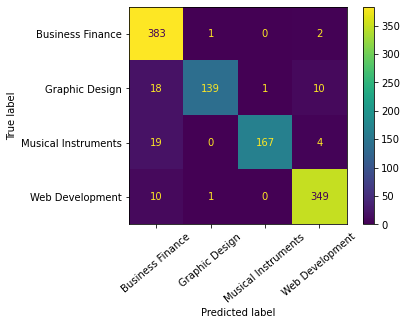

In [54]:
plot_confusion_matrix(lr_model,x_test,y_test,xticks_rotation=40)

In [55]:
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.99      0.89      0.94       430
     Graphic Design       0.83      0.99      0.90       141
Musical Instruments       0.88      0.99      0.93       168
    Web Development       0.97      0.96      0.96       365

           accuracy                           0.94      1104
          macro avg       0.92      0.96      0.93      1104
       weighted avg       0.95      0.94      0.94      1104



In [56]:
def vectorize_text(text):
    my_vec = tfidf_vec.transform([text])
    return my_vec.toarray()

In [57]:
vectorize_text(ex)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [58]:
sample1 = vectorize_text(ex)

In [59]:
lr_model.predict(sample1)

array(['Web Development'], dtype=object)

In [60]:
# Prediction Prob
lr_model.predict_proba(sample1)

array([[0.05303068, 0.05161384, 0.04939647, 0.84595902]])

In [61]:
lr_model.classes_

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

KNN

In [62]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Training the KNN model
k = 5  # You can adjust the value of k as per your choice
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)

# Making predictions
y_pred = knn_model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN model:", accuracy)

Accuracy of KNN model: 0.5262681159420289


In [63]:
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.96      0.44      0.61       836
     Graphic Design       0.21      0.51      0.30        70
Musical Instruments       0.34      0.76      0.47        84
    Web Development       0.31      0.96      0.46       114

           accuracy                           0.53      1104
          macro avg       0.45      0.67      0.46      1104
       weighted avg       0.80      0.53      0.56      1104

